# Modelling Covid 19

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
from numpy import exp

In [4]:
from scipy.integrate import odeint

## SIR Model

In [5]:
pop_size = 3.3e8

In [7]:
γ = 1 / 18
σ = 1 / 5.2

def F(x, t, R0=1.6):
    """
    Time derivative of the state vector.

        * x is the state vector (array_like)
        * t is time (scalar)
        * R0 is the effective transmission rate, defaulting to a constant

    """
    s, e, i = x

    # New exposure of susceptibles
    β = R0(t) * γ if callable(R0) else R0 * γ
    ne = β * s * i

    # Time derivatives
    ds = - ne
    de = ne - σ * e
    di = σ * e - γ * i

    return ds, de, di

In [9]:
# initial conditions of s, e, i
i_0 = 1e-7
e_0 = 4 * i_0
s_0 = 1 - i_0 - e_0

x_0 = s_0, e_0, i_0

In [10]:
def solve_path(R0, t_vec, x_init=x_0):
    """
    Solve for i(t) and c(t) via numerical integration,
    given the time path for R0.
    """
    G = lambda x, t: F(x, t, R0)
    s_path, e_path, i_path = odeint(G, x_init, t_vec).transpose()

    c_path = 1 - s_path - e_path       # cumulative cases
    return i_path, c_path

## Experiment 1 : Constant R0

In [11]:
t_length = 550
grid_size = 1000
t_vec = np.linspace(0, t_length, grid_size)

In [12]:
R0_vals = np.linspace(1.6, 3.0, 6)
labels = [f'$R0 = {r:.2f}$' for r in R0_vals]
i_paths, c_paths = [], []

for r in R0_vals:
    i_path, c_path = solve_path(r, t_vec)
    i_paths.append(i_path)
    c_paths.append(c_path)

In [13]:
def plot_paths(paths, labels, times=t_vec):

    fig, ax = plt.subplots()

    for path, label in zip(paths, labels):
        ax.plot(times, path, label=label)

    ax.legend(loc='upper left')

    plt.show()

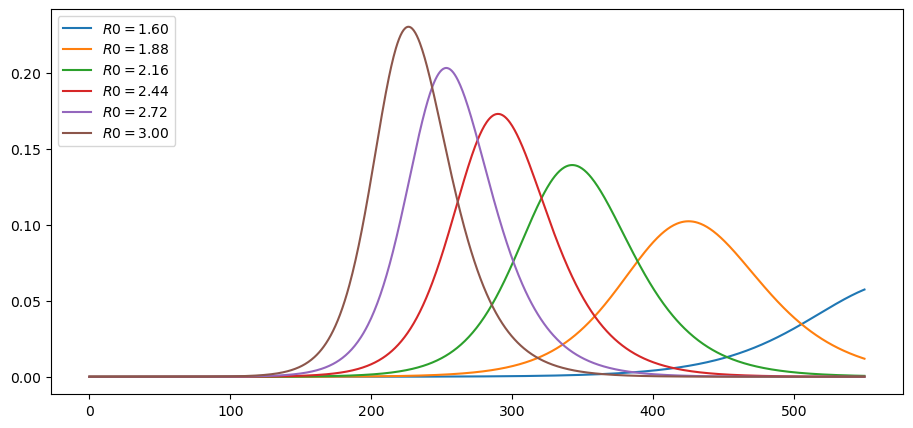

In [14]:
plot_paths(i_paths, labels)

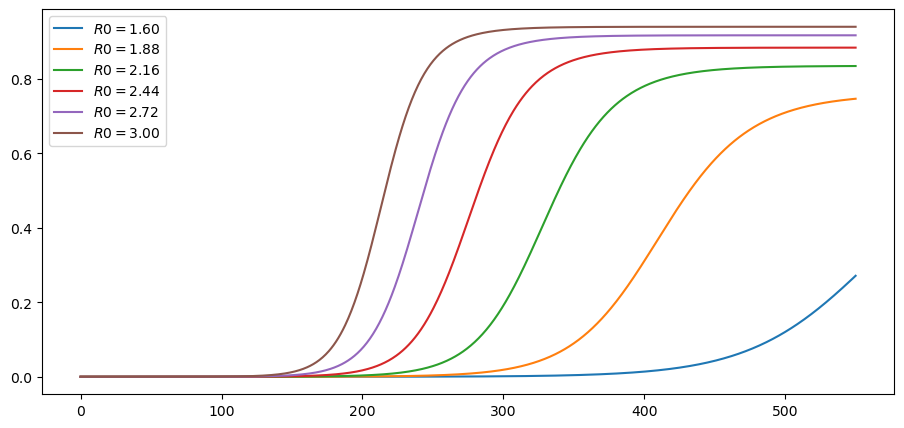

In [15]:
plot_paths(c_paths, labels)